# アミノ酸配列のグラフ表示画像のTransformerによるタンパク質ファミリー分類（5分割交差検証）
- 埋め込みベクトルに使用したモデル：`esm-1b`
- 埋め込みベクトル作成手法：`UMAP`

## 1. 画像とラベルの対応を取る `Dataset` を作成

In [1]:
from torch.utils.data import Dataset
from PIL import Image

import os

label2id = {"A": 0, "B": 1, "C": 2, "D": 3, "E": 4}
id2label = {v: k for k, v in label2id.items()}

class GPCRImageDataset(Dataset):
    def __init__(self, csv_path, img_dir, transform=None):
        self.data = pd.read_csv(csv_path, header=None, names=["num", "label", "accession"])
        self.img_dir = img_dir
        self.transform = transform

    def __len__(self):
        return len(self.data)

    def __getitem__(self, idx):
        row = self.data.iloc[idx]
        img_path = os.path.join(self.img_dir, f"{row['num']}.png")
        image = Image.open(img_path).convert("RGB")
        label = label2id[row["label"]]

        if self.transform:
            image = self.transform(image)

        return {
            "pixel_values": image,
            "label": label
        }

## 2. 画像前処理（ViT用）

In [2]:
from torchvision.transforms import Compose, Resize, ToTensor, Normalize
# from transformers import AutoImageProcessor
from transformers import ViTImageProcessorFast, ViTForImageClassification

processor = ViTImageProcessorFast.from_pretrained("google/vit-base-patch16-224-in21k")
transform = Compose([
    Resize((224, 224)),
    ToTensor(),
    Normalize(mean=processor.image_mean, std=processor.image_std)
])

## 3. `Trainer` を使って学習

[Fold 1 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_123169/2784381650.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.722809,0.710492,0.598254
2,No log,0.647974,0.751295,0.721925
3,0.710600,0.703527,0.716969,0.708769
4,0.710600,0.743497,0.767487,0.745470
5,0.710600,0.731419,0.755829,0.750897
6,0.400500,0.793925,0.764896,0.753073
7,0.400500,0.845646,0.738990,0.740812
8,0.225600,0.859321,0.757124,0.753454
9,0.225600,0.877607,0.756477,0.751580
10,0.225600,0.909232,0.757124,0.753041


Fold 1 F1 Score: 0.7530
Confusion Matrix:
 [[933  42 111   0   0]
 [ 49  17  10   0   0]
 [143  15 219   0   0]
 [  1   0   0   0   0]
 [  1   2   1   0   0]]
              precision    recall  f1-score      support
A              0.827862  0.859116  0.843199  1086.000000
B              0.223684  0.223684  0.223684    76.000000
C              0.642229  0.580902  0.610028   377.000000
D              0.000000  0.000000  0.000000     1.000000
E              0.000000  0.000000  0.000000     4.000000
accuracy       0.757124  0.757124  0.757124     0.757124
macro avg      0.338755  0.332740  0.335382  1544.000000
weighted avg   0.750115  0.757124  0.753041  1544.000000


/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

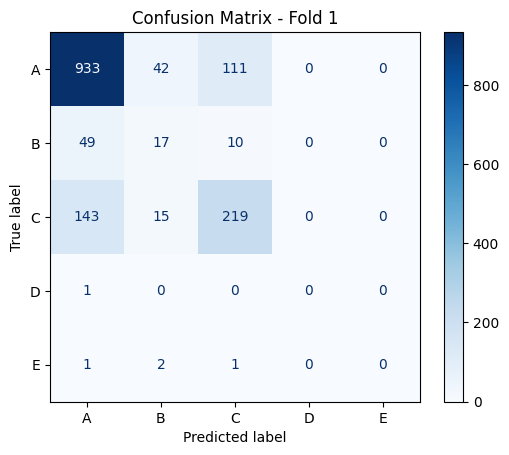

[Fold 2 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_123169/2784381650.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.767633,0.689566,0.577737
2,No log,0.746947,0.696695,0.686832
3,0.700500,0.646278,0.772521,0.737922
4,0.700500,0.654979,0.774465,0.746394
5,0.700500,0.695688,0.743357,0.737674
6,0.394600,0.750106,0.754375,0.752676
7,0.394600,0.734363,0.766040,0.748825
8,0.234700,0.770476,0.745949,0.748680
9,0.234700,0.785709,0.756319,0.749141
10,0.234700,0.809978,0.758911,0.746552


Fold 2 F1 Score: 0.7466
Confusion Matrix:
 [[938  33  98   0   0]
 [ 68  16   7   0   0]
 [155   6 217   0   0]
 [  2   0   1   0   0]
 [  1   1   0   0   0]]
              precision    recall  f1-score      support
A              0.805842  0.877456  0.840125  1069.000000
B              0.285714  0.175824  0.217687    91.000000
C              0.671827  0.574074  0.619116   378.000000
D              0.000000  0.000000  0.000000     3.000000
E              0.000000  0.000000  0.000000     2.000000
accuracy       0.758911  0.758911  0.758911     0.758911
macro avg      0.352677  0.325471  0.335386  1543.000000
weighted avg   0.739725  0.758911  0.746552  1543.000000


/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

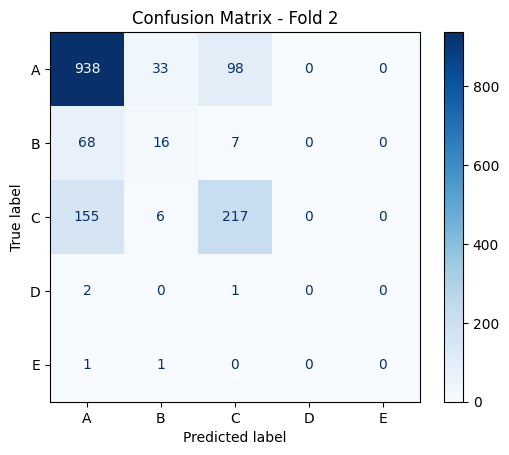

[Fold 3 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_123169/2784381650.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.723585,0.728451,0.654102
2,No log,0.747427,0.684381,0.676455
3,0.691400,0.685220,0.766040,0.727790
4,0.691400,0.702691,0.765392,0.741354
5,0.691400,0.740529,0.757615,0.743672
6,0.381200,0.790353,0.762800,0.750874
7,0.381200,0.812172,0.767336,0.752844
8,0.222100,0.859685,0.745301,0.746213
9,0.222100,0.873705,0.748542,0.744628
10,0.222100,0.902290,0.750486,0.745022


Fold 3 F1 Score: 0.7450
Confusion Matrix:
 [[919  41 121   0   0]
 [ 53  17  13   0   0]
 [139  12 222   0   0]
 [  3   0   0   0   0]
 [  3   0   0   0   0]]
              precision    recall  f1-score      support
A              0.822739  0.850139  0.836215  1081.000000
B              0.242857  0.204819  0.222222    83.000000
C              0.623596  0.595174  0.609053   373.000000
D              0.000000  0.000000  0.000000     3.000000
E              0.000000  0.000000  0.000000     3.000000
accuracy       0.750486  0.750486  0.750486     0.750486
macro avg      0.337838  0.330026  0.333498  1543.000000
weighted avg   0.740207  0.750486  0.745022  1543.000000


/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

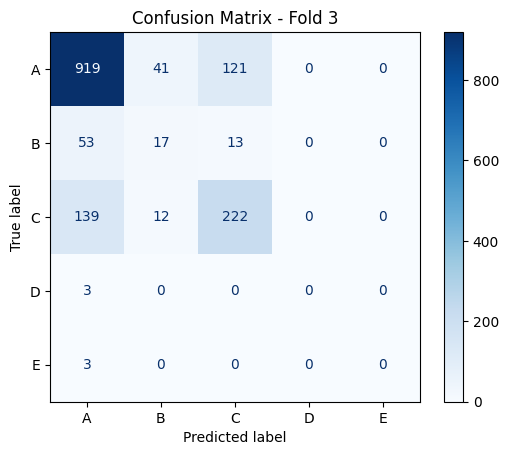

[Fold 4 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_123169/2784381650.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.757472,0.706416,0.655735
2,No log,0.765346,0.687622,0.674960
3,0.687900,0.692770,0.763448,0.729736
4,0.687900,0.759535,0.751134,0.731258
5,0.687900,0.746708,0.755023,0.737725
6,0.377300,0.813628,0.721322,0.725134
7,0.377300,0.783292,0.757615,0.741227
8,0.219700,0.849094,0.745301,0.734525
9,0.219700,0.895608,0.749838,0.743872
10,0.219700,0.907407,0.751782,0.744860


Fold 4 F1 Score: 0.7449
Confusion Matrix:
 [[902  41 113   0   0]
 [ 62  19  13   0   0]
 [137  12 239   0   0]
 [  3   0   0   0   0]
 [  0   1   1   0   0]]
              precision    recall  f1-score      support
A              0.817029  0.854167  0.835185  1056.000000
B              0.260274  0.202128  0.227545    94.000000
C              0.653005  0.615979  0.633952   388.000000
D              0.000000  0.000000  0.000000     3.000000
E              0.000000  0.000000  0.000000     2.000000
accuracy       0.751782  0.751782  0.751782     0.751782
macro avg      0.346062  0.334455  0.339336  1543.000000
weighted avg   0.739219  0.751782  0.744860  1543.000000


/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

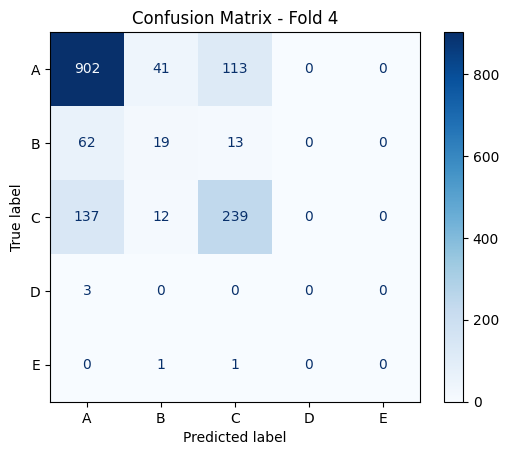

[Fold 5 / 5]


Some weights of ViTForImageClassification were not initialized from the model checkpoint at google/vit-base-patch16-224-in21k and are newly initialized: ['classifier.bias', 'classifier.weight']
You should probably TRAIN this model on a down-stream task to be able to use it for predictions and inference.
/tmp/ipykernel_123169/2784381650.py:54: FutureWarning: `tokenizer` is deprecated and will be removed in version 5.0.0 for `Trainer.__init__`. Use `processing_class` instead.
  trainer = Trainer(


Epoch,Training Loss,Validation Loss,Accuracy,F1
1,No log,0.809305,0.694102,0.616954
2,No log,0.853960,0.628645,0.617760
3,0.685600,0.698131,0.750486,0.712240
4,0.685600,0.739261,0.747246,0.711167
5,0.685600,0.733302,0.758263,0.722437
6,0.400700,0.802078,0.747894,0.723121
7,0.400700,0.788914,0.757615,0.737705
8,0.232700,0.823406,0.758911,0.735000
9,0.232700,0.848660,0.757615,0.736613
10,0.232700,0.868526,0.760207,0.739495


Fold 5 F1 Score: 0.7395
Confusion Matrix:
 [[914  16  80   0   0]
 [ 73  17  20   0   0]
 [161  10 242   0   0]
 [  3   0   0   0   0]
 [  6   1   0   0   0]]
              precision    recall  f1-score      support
A              0.789974  0.904950  0.843563  1010.000000
B              0.386364  0.154545  0.220779   110.000000
C              0.707602  0.585956  0.641060   413.000000
D              0.000000  0.000000  0.000000     3.000000
E              0.000000  0.000000  0.000000     7.000000
accuracy       0.760207  0.760207  0.760207     0.760207
macro avg      0.376788  0.329090  0.341080  1543.000000
weighted avg   0.734033  0.760207  0.739495  1543.000000


/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0])
/media/ssd/GR2025/.venv/lib/python3.13/site-packages/sklearn/metrics/_classification.py:1731: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", result.shape[0]

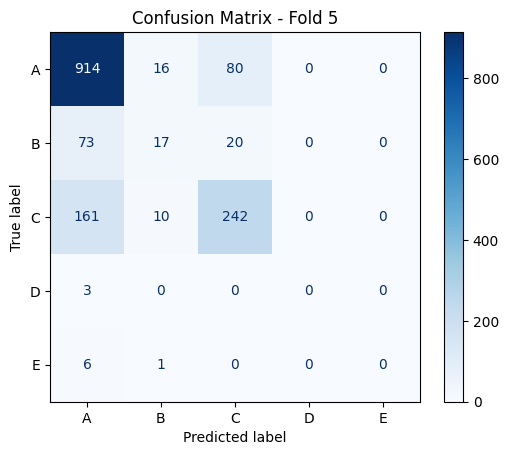


Average F1 Score: 0.745793958630427
Confusion Matrix:
 [[4606  173  523    0    0]
 [ 305   86   63    0    0]
 [ 735   55 1139    0    0]
 [  12    0    1    0    0]
 [  11    5    2    0    0]]


In [3]:
from transformers import TrainingArguments, Trainer
import matplotlib.pyplot as plt
import numpy as np
import evaluate
from sklearn.model_selection import KFold
from sklearn.metrics import classification_report, confusion_matrix, f1_score, ConfusionMatrixDisplay
from torch.utils.data import Subset
import pandas as pd

accuracy = evaluate.load("accuracy")

# 5分割交差検証の設定
kfold = KFold(n_splits=5, shuffle=True, random_state=42)

dataset = GPCRImageDataset("../gpcr_labels.csv", "../graphs/esm1b/umap2", transform=transform)

all_f1_scores = []
all_conf_matrices = []

for fold, (train_idx, val_idx) in enumerate(kfold.split(dataset)):
    print(f"\033[34m[Fold {fold+1} / 5]\033[0m")

    # Subset 作成
    train_dataset = Subset(dataset, train_idx)
    val_dataset = Subset(dataset, val_idx)

    # モデルを毎回初期化
    model = ViTForImageClassification.from_pretrained(
        "google/vit-base-patch16-224-in21k",
        num_labels=5,
        id2label=id2label,
        label2id=label2id
    )

    training_args = TrainingArguments(
        output_dir=f"../models/esm1b/umap2/vit-gpcr-fold{fold}",
        per_device_train_batch_size=32,
        eval_strategy="epoch",
        save_strategy="epoch",
        num_train_epochs=10,
        logging_dir="./logs",
        report_to="none"
    )

    def compute_metrics(eval_pred):
        logits, labels = eval_pred
        preds = np.argmax(logits, axis=-1)
        f1 = f1_score(labels, preds, average="weighted")
        return {
            "accuracy": accuracy.compute(predictions=preds, references=labels)["accuracy"],
            "f1": f1
        }

    trainer = Trainer(
        model=model,
        args=training_args,
        train_dataset=train_dataset,
        eval_dataset=val_dataset,
        tokenizer=processor,
        compute_metrics=compute_metrics
    )

    trainer.train()

    # 推論 & 評価
    preds = trainer.predict(val_dataset)
    y_true = preds.label_ids
    y_pred = np.argmax(preds.predictions, axis=1)

    # ラベルIDのリストを明示的に渡す
    label_ids = list(range(len(label2id)))  # [0, 1, 2, 3, 4]
    display_names = list(label2id.keys())  # ["A", "B", "C", "D", "E"]

    f1 = f1_score(y_true, y_pred, average="weighted")
    cm = confusion_matrix(y_true, y_pred, labels=label_ids)

    report = classification_report(y_true, y_pred, target_names=display_names, output_dict=True)
    report_df = pd.DataFrame(report).T

    print(f"Fold {fold+1} F1 Score: \033[32m{f1:.4f}\033[0m")
    print("Confusion Matrix:\n", cm)
    print(report_df)

    all_f1_scores.append(f1)
    all_conf_matrices.append(cm)

    # 混同行列を可視化
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=display_names)
    disp.plot(cmap="Blues")
    plt.title(f"Confusion Matrix - Fold {fold+1}")
    plt.show()

# 最終結果をまとめる
print("\nAverage F1 Score:", np.mean(all_f1_scores))
print("Confusion Matrix:\n", sum(all_conf_matrices))